# Statistical Analysis of 2022-2023 Premier League Season

## Overall Season

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [37]:
Premier_League = pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats#all_rank_key")

In [38]:
# Excluding unnecessary columns 
Premier_League = Premier_League[0].drop(["Pts/MP", "xG", "xGA", "xGD", "xGD/90", "Last 5", "Attendance", "Top Team Scorer", "Goalkeeper", "Notes"]
                  , axis = 1)

In [39]:
# Reset the index as the team's name
Premier_League.set_index("Squad", inplace=True)

In [40]:
Premier_League

,Rk,MP,W,D,L,GF,GA,GD,Pts
Squad,,,,,,,,,
Arsenal,1,18,15,2,1,42,14,28,47
Manchester City,2,18,12,3,3,46,18,28,39
Newcastle Utd,3,19,10,8,1,33,11,22,38
Manchester Utd,4,18,12,2,4,29,21,8,38
Tottenham,5,19,10,3,6,37,27,10,33
Fulham,6,20,9,4,7,32,29,3,31
Brighton,7,18,9,3,6,35,25,10,30
Brentford,8,19,7,8,4,32,28,4,29
Liverpool,9,18,8,4,6,34,25,9,28


In [162]:
# Top four team 
top_4_team = Premier_League.iloc[:4]
top_4_team

,Rk,MP,W,D,L,GF,GA,GD,Pts
Squad,,,,,,,,,
Arsenal,1,18,15,2,1,42,14,28,47
Manchester City,2,18,12,3,3,46,18,28,39
Newcastle Utd,3,19,10,8,1,33,11,22,38
Manchester Utd,4,18,12,2,4,29,21,8,38


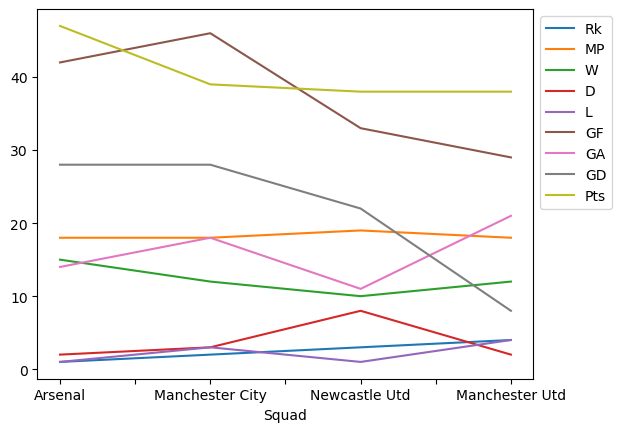

In [165]:
# Comparison of the top four team 
top_4_team.plot().legend(bbox_to_anchor=(1,1));

In [41]:
# Average Points 
average_points = Premier_League['Pts'].mean()
average_points

26.0

In [42]:
# Average Wins 
average_wins = Premier_League['W'].mean()
average_wins

7.3

In [43]:
# Average Lose
average_lose = Premier_League['L'].mean()
average_lose

7.3

In [44]:
# Average Draw
average_draw = Premier_League['D'].mean()
average_draw

4.1

In [45]:
# Average goal scored per game
average_goal_scored_per_game = Premier_League['GF'].sum() / Premier_League['MP'].sum() 
average_goal_scored_per_game

1.4037433155080214

In [46]:
# Average goal conceded per game
average_goal_conceded_per_game = Premier_League['GA'].sum() / Premier_League['MP'].sum() 
average_goal_conceded_per_game

1.4037433155080214

In [47]:
# Total number of goals scored 
total_goal_scored = Premier_League['GF'].sum()
total_goal_scored

525

In [49]:
# Total number of goals conceded  
total_goal_conceded = Premier_League['GA'].sum()
total_goal_conceded

525

In [155]:
# Teams with biggest gaol differences 
Premier_League[['GD']].sort_values('GD', ascending=False)

,GD
Squad,
Arsenal,28
Manchester City,28
Newcastle Utd,22
Tottenham,10
Brighton,10
Liverpool,9
Manchester Utd,8
Brentford,4
Fulham,3


In [67]:
# Teams that scored the most gaols 
Premier_League.sort_values("GF", ascending=False).iloc[0:1, ]

,Rk,MP,W,D,L,GF,GA,GD,Pts
Squad,,,,,,,,,
Manchester City,2,18,12,3,3,46,18,28,39


In [94]:
#Points Per game per team
points_per_game = Premier_League['Pts'] / Premier_League["MP"]
points_per_game

Squad
Arsenal            2.611111
Manchester City    2.166667
Newcastle Utd      2.000000
Manchester Utd     2.111111
Tottenham          1.736842
Fulham             1.550000
Brighton           1.666667
Brentford          1.526316
Liverpool          1.555556
Chelsea            1.473684
Aston Villa        1.315789
Crystal Palace     1.222222
Nott'ham Forest    1.052632
Leicester City     0.894737
Leeds United       0.944444
Wolves             0.894737
Bournemouth        0.842105
West Ham           0.789474
Everton            0.789474
Southampton        0.789474
dtype: float64

In [51]:
# Percentage of win, lose, and draw per team
win_lose_draw = (Premier_League.assign
                ( 
                    WIN = lambda x: x['W'] / x['MP'],
                    LOSE = lambda x: x['L'] / x['MP'],
                    DRAW = lambda x: x['D'] / x['MP']
                ))
win_lose_draw

,Rk,MP,W,D,L,GF,GA,GD,Pts,WIN,LOSE,DRAW
Squad,,,,,,,,,,,,
Arsenal,1,18,15,2,1,42,14,28,47,0.833333,0.055556,0.111111
Manchester City,2,18,12,3,3,46,18,28,39,0.666667,0.166667,0.166667
Newcastle Utd,3,19,10,8,1,33,11,22,38,0.526316,0.052632,0.421053
Manchester Utd,4,18,12,2,4,29,21,8,38,0.666667,0.222222,0.111111
Tottenham,5,19,10,3,6,37,27,10,33,0.526316,0.315789,0.157895
Fulham,6,20,9,4,7,32,29,3,31,0.450000,0.350000,0.200000
Brighton,7,18,9,3,6,35,25,10,30,0.500000,0.333333,0.166667
Brentford,8,19,7,8,4,32,28,4,29,0.368421,0.210526,0.421053
Liverpool,9,18,8,4,6,34,25,9,28,0.444444,0.333333,0.222222


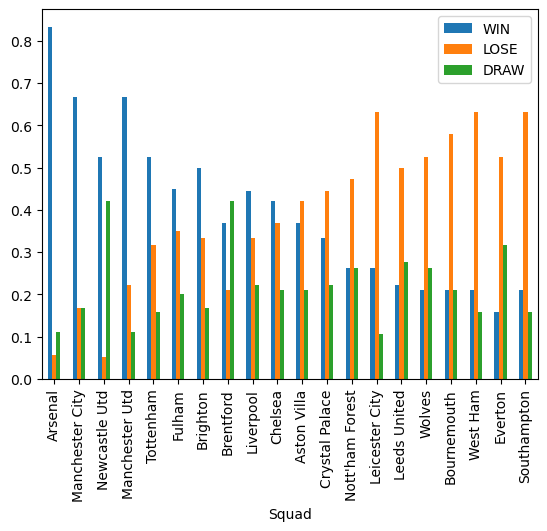

In [52]:
# Bar chart for the win, lose, draw percentage per team 
win_lose_draw.loc[:, "WIN":"DRAW"].plot.bar();

In [53]:
# Total points vs. avaliable points 
total_points_vs_avaliable_points = (Premier_League.assign(
                                TOTAL_VS_AVALIABLE = lambda x: (x['MP'] * 3) - x['Pts'] 
                                ))
total_points_vs_avaliable_points

,Rk,MP,W,D,L,GF,GA,GD,Pts,TOTAL_VS_AVALIABLE
Squad,,,,,,,,,,
Arsenal,1,18,15,2,1,42,14,28,47,7
Manchester City,2,18,12,3,3,46,18,28,39,15
Newcastle Utd,3,19,10,8,1,33,11,22,38,19
Manchester Utd,4,18,12,2,4,29,21,8,38,16
Tottenham,5,19,10,3,6,37,27,10,33,24
Fulham,6,20,9,4,7,32,29,3,31,29
Brighton,7,18,9,3,6,35,25,10,30,24
Brentford,8,19,7,8,4,32,28,4,29,28
Liverpool,9,18,8,4,6,34,25,9,28,26


In [54]:
#  The bottom three teams are relegated
relegation_team = Premier_League.tail(3)
relegation_team

,Rk,MP,W,D,L,GF,GA,GD,Pts
Squad,,,,,,,,,
West Ham,18,19,4,3,12,15,25,-10,15
Everton,19,19,3,6,10,15,26,-11,15
Southampton,20,19,4,3,12,17,34,-17,15


## Home vs. Away

In [4]:
home_vs_away = pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats#all_leaders")
home_vs_away = home_vs_away[1]

# Rank and Team's name
rk_and_squad = home_vs_away.iloc[:, 0:2].droplevel(0, axis=1)
rk_and_squad

,Rk,Squad
0,1,Arsenal
1,2,Manchester City
2,3,Newcastle Utd
3,4,Manchester Utd
4,5,Tottenham
5,6,Fulham
6,7,Brighton
7,8,Brentford
8,9,Liverpool
9,10,Chelsea


In [5]:
# Home Stats 
home = home_vs_away.loc[:, "Home"]
home = home.drop(["Pts/MP", "xG", "xGA", "xGD", "xGD/90"], axis = 1)
home.rename(columns=
            {"MP": "H_MP", 
             "W": "H_W", 
             "D": "H_D",
             "L": "H_L",
             "GF": "H_GF",
             "GA": "H_GA",
             "GD": "H_GD",
             "Pts": "H_Pts",
            }, inplace=True
           )
home

,H_MP,H_W,H_D,H_L,H_GF,H_GA,H_GD,H_Pts
0,8,7,1,0,22,8,14,22
1,9,7,1,1,31,10,21,22
2,10,6,4,0,18,5,13,22
3,9,7,1,1,17,5,12,22
4,10,6,0,4,21,15,6,18
5,10,5,3,2,18,15,3,18
6,9,4,2,3,16,10,6,14
7,10,5,4,1,20,10,10,19
8,9,6,2,1,23,9,14,20
9,9,5,2,2,13,7,6,17


In [6]:
# Away Stats 
away = home_vs_away.loc[:, "Away"] 
away = away.drop(["Pts/MP", "xG", "xGA", "xGD", "xGD/90"], axis = 1)
away.rename(columns=
            {"MP": "A_MP", 
             "W": "A_W", 
             "D": "A_D",
             "L": "A_L",
             "GF": "A_GF",
             "GA": "A_GA",
             "GD": "A_GD",
             "Pts": "A_Pts",
            }, inplace=True
           )
away

,A_MP,A_W,A_D,A_L,A_GF,A_GA,A_GD,A_Pts
0,10,8,1,1,20,6,14,25
1,9,5,2,2,15,8,7,17
2,9,4,4,1,15,6,9,16
3,9,5,1,3,12,16,-4,16
4,9,4,3,2,16,12,4,15
5,10,4,1,5,14,14,0,13
6,9,5,1,3,19,15,4,16
7,9,2,4,3,12,18,-6,10
8,9,2,2,5,11,16,-5,8
9,10,3,2,5,9,14,-5,11


In [13]:
# Merging all three df
home_vs_away = (rk_and_squad.merge
            (home, "inner", left_index=True, right_index=True)
            .merge(away, "inner", left_index=True, right_index=True))
        
home_vs_away.set_index("Squad", inplace=True)
home_vs_away

,Rk,H_MP,H_W,H_D,H_L,H_GF,H_GA,H_GD,H_Pts,A_MP,A_W,A_D,A_L,A_GF,A_GA,A_GD,A_Pts
Squad,,,,,,,,,,,,,,,,,
Arsenal,1,8,7,1,0,22,8,14,22,10,8,1,1,20,6,14,25
Manchester City,2,9,7,1,1,31,10,21,22,9,5,2,2,15,8,7,17
Newcastle Utd,3,10,6,4,0,18,5,13,22,9,4,4,1,15,6,9,16
Manchester Utd,4,9,7,1,1,17,5,12,22,9,5,1,3,12,16,-4,16
Tottenham,5,10,6,0,4,21,15,6,18,9,4,3,2,16,12,4,15
Fulham,6,10,5,3,2,18,15,3,18,10,4,1,5,14,14,0,13
Brighton,7,9,4,2,3,16,10,6,14,9,5,1,3,19,15,4,16
Brentford,8,10,5,4,1,20,10,10,19,9,2,4,3,12,18,-6,10
Liverpool,9,9,6,2,1,23,9,14,20,9,2,2,5,11,16,-5,8


In [9]:
# Total goal scored at home 
total_goal_scored_at_home = home_vs_away['H_GF'].sum()
total_goal_scored_at_home

303

In [10]:
# Total goal scored at away 
total_goal_scored_at_away = home_vs_away['A_GF'].sum()
total_goal_scored_at_away

222

In [19]:
# Average goal scored at home 
home_vs_away['H_GF'].mean() 

15.15

In [20]:
# Average goal scored at away 
home_vs_away['A_GF'].mean() 

11.1

In [16]:
# home vs. Away win percenatge 
home_away_win_percenatge = home_vs_away.assign(
                        HOME_WIN = lambda x: x['H_W'] / x['H_MP'],
                        AWAY_WIN = lambda x: x['A_W'] / x['A_MP'],
                    )
home_away_win_percenatge = home_away_win_percenatge.loc[:, ["HOME_WIN", "AWAY_WIN"]]

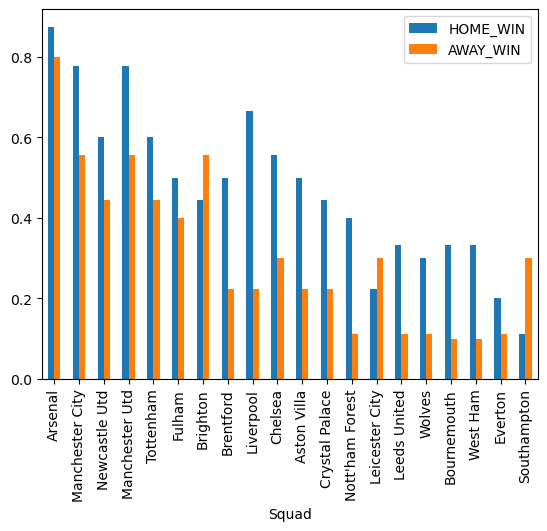

In [18]:
home_away_win_percenatge.plot.bar();

In [23]:
# Teams that earned more point at home 
home_vs_away[home_vs_away['H_Pts'] > home_vs_away['A_Pts']].loc[:, ['H_Pts', 'A_Pts']]

,H_Pts,A_Pts
Squad,,
Manchester City,22,17
Newcastle Utd,22,16
Manchester Utd,22,16
Tottenham,18,15
Fulham,18,13
Brentford,19,10
Liverpool,20,8
Chelsea,17,11
Aston Villa,17,8


In [34]:
# Teams that scored more goals at away 
home_vs_away[home_vs_away['H_GF'] < home_vs_away['A_GF']].loc[:, ['H_GF', 'A_GF']]

,H_GF,A_GF
Squad,,
Brighton,16,19
Leicester City,9,17


In [35]:
# Teams that conceded less goals at hoome 
home_vs_away[home_vs_away['H_GA'] < home_vs_away['A_GA']].loc[:, ['H_GA', 'A_GA']]

,H_GA,A_GA
Squad,,
Newcastle Utd,5,6
Manchester Utd,5,16
Brighton,10,15
Brentford,10,18
Liverpool,9,16
Chelsea,7,14
Aston Villa,11,16
Nott'ham Forest,12,22
Leicester City,10,23


In [26]:
# Total Point Per Team 
total_points_per_team = np.add(home_vs_away['H_Pts'], home_vs_away['A_Pts'])
total_points_per_team

Squad
Arsenal            47
Manchester City    39
Newcastle Utd      38
Manchester Utd     38
Tottenham          33
Fulham             31
Brighton           30
Brentford          29
Liverpool          28
Chelsea            28
Aston Villa        25
Crystal Palace     22
Nott'ham Forest    20
Leicester City     17
Leeds United       17
Wolves             17
Bournemouth        16
West Ham           15
Everton            15
Southampton        15
dtype: int64

In [84]:
# Teams that scored most goals at home 
home_vs_away.sort_values("H_GF", ascending = False).iloc[0:1,:]

,Rk,H_MP,H_W,H_D,H_L,H_GF,H_GA,H_GD,H_Pts,A_MP,A_W,A_D,A_L,A_GF,A_GA,A_GD,A_Pts
Squad,,,,,,,,,,,,,,,,,
Manchester City,2,9,7,1,1,31,10,21,22,9,5,2,2,15,8,7,17


In [85]:
# Teams that scored most goals at  away 
home_vs_away.sort_values("A_GF", ascending = False).iloc[0:1,:]

,Rk,H_MP,H_W,H_D,H_L,H_GF,H_GA,H_GD,H_Pts,A_MP,A_W,A_D,A_L,A_GF,A_GA,A_GD,A_Pts
Squad,,,,,,,,,,,,,,,,,
Arsenal,1,8,7,1,0,22,8,14,22,10,8,1,1,20,6,14,25


## Player Stats 

In [99]:
players = pd.read_html("https://www.espn.com/soccer/stats/_/league/ENG.1/view/scoring/team")

In [119]:
Top_Scorers = players[0]
# Filling missing data and changing data-type 
Top_Scorers = Top_Scorers.interpolate().astype({"RK":"int8"})
Top_Scorers

,RK,Name,Team,P,G
0,1,Erling Haaland,Manchester City,17,21
1,2,Harry Kane,Tottenham Hotspur,19,15
2,3,Ivan Toney,Brentford,17,13
3,4,Aleksandar Mitrovic,Fulham,16,11
4,5,Rodrigo,Leeds United,17,10
5,6,Miguel Almirón,Newcastle United,19,9
6,7,Marcus Rashford,Manchester United,18,8
7,8,Martin Ødegaard,Arsenal,17,8
8,9,Mohamed Salah,Liverpool,18,7
9,10,Gabriel Martinelli,Arsenal,18,7


In [118]:
Top_Assists = players[1]
# Filling missing data and changing data-type 
Top_Assists = Top_Assists.interpolate().astype({"RK":"int8"})
Top_Assists

,RK,Name,Team,P,A
0,1,Kevin De Bruyne,Manchester City,18,10
1,2,Bukayo Saka,Arsenal,18,7
2,3,Christian Eriksen,Manchester United,17,6
3,4,Andreas Pereira,Fulham,20,5
4,5,Alex Iwobi,Everton,19,5
5,6,Ivan Perisic,Tottenham Hotspur,19,5
6,7,Mohamed Salah,Liverpool,18,5
7,8,Martin Ødegaard,Arsenal,17,5
8,9,Bernardo Silva,Manchester City,17,5
9,10,Andy Robertson,Liverpool,16,5


In [120]:
# Top 5 goal scorer 
top_five_goal_scorer = Top_Scorers.iloc[:5]
top_five_goal_scorer

,RK,Name,Team,P,G
0,1,Erling Haaland,Manchester City,17,21
1,2,Harry Kane,Tottenham Hotspur,19,15
2,3,Ivan Toney,Brentford,17,13
3,4,Aleksandar Mitrovic,Fulham,16,11
4,5,Rodrigo,Leeds United,17,10


In [121]:
# Top 5 player with assist 
top_five_player_assist = Top_Assists.iloc[:5]
top_five_player_assist

,RK,Name,Team,P,A
0,1,Kevin De Bruyne,Manchester City,18,10
1,2,Bukayo Saka,Arsenal,18,7
2,3,Christian Eriksen,Manchester United,17,6
3,4,Andreas Pereira,Fulham,20,5
4,5,Alex Iwobi,Everton,19,5


In [142]:
# Goal Scored Per Game
goal_scored_per_game = Top_Scorers.assign(GOAL_SCORED_PER_GAME = Top_Scorers['G'] / Top_Scorers['P'])
goal_scored_per_game.set_index("Name").loc[:, "GOAL_SCORED_PER_GAME"]

Name
Erling Haaland           1.235294
Harry Kane               0.789474
Ivan Toney               0.764706
Aleksandar Mitrovic      0.687500
Rodrigo                  0.588235
Miguel Almirón           0.473684
Marcus Rashford          0.444444
Martin Ødegaard          0.470588
Mohamed Salah            0.388889
Gabriel Martinelli       0.388889
Phil Foden               0.388889
Leandro Trossard         0.437500
James Maddison           0.538462
Roberto Firmino          0.538462
Pascal Groß              0.333333
Bukayo Saka              0.333333
Danny Ings               0.333333
Wilfried Zaha            0.352941
Harvey Barnes            0.352941
Callum Wilson            0.428571
James Ward-Prowse        0.263158
Daniel Podence           0.263158
Kai Havertz              0.277778
Alexis Mac Allister      0.312500
Gabriel Jesus            0.357143
Darwin Núñez             0.384615
Bobby De Cordova-Reid    0.210526
Brennan Johnson          0.210526
Bryan Mbeumo             0.210526
Phillip B

In [146]:
# Top 10 player with highest goals scored per game
goal_scored_per_game.set_index("Name").loc[:, "GOAL_SCORED_PER_GAME"].sort_values(ascending=False)[:10]

Name
Erling Haaland         1.235294
Harry Kane             0.789474
Ivan Toney             0.764706
Aleksandar Mitrovic    0.687500
Rodrigo                0.588235
James Maddison         0.538462
Roberto Firmino        0.538462
Miguel Almirón         0.473684
Martin Ødegaard        0.470588
Marcus Rashford        0.444444
Name: GOAL_SCORED_PER_GAME, dtype: float64

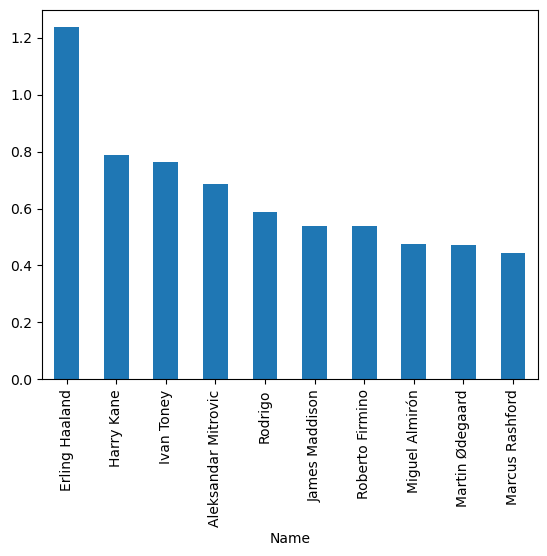

In [150]:
# Bar Chart for Top 10 player with highest goals scored per game
goal_scored_per_game.set_index("Name").loc[:, "GOAL_SCORED_PER_GAME"].sort_values(ascending=False)[:10].plot.bar();

In [136]:
# Assist Per Game
assist_per_game = Top_Assists.assign(ASSIST_PER_GAME = Top_Assists['A'] / Top_Assists['P'])
assist_per_game.set_index("Name").loc[:, "ASSIST_PER_GAME"]

Name
Kevin De Bruyne          0.555556
Bukayo Saka              0.388889
Christian Eriksen        0.352941
Andreas Pereira          0.250000
Alex Iwobi               0.263158
Ivan Perisic             0.263158
Mohamed Salah            0.277778
Martin Ødegaard          0.294118
Bernardo Silva           0.294118
Andy Robertson           0.312500
Gabriel Jesus            0.357143
Dejan Kulusevski         0.454545
Kieran Trippier          0.210526
Mathias Jensen           0.210526
Jamie Vardy              0.210526
Solly March              0.222222
Granit Xhaka             0.222222
Morgan Gibbs-White       0.222222
Ollie Watkins            0.222222
Phil Foden               0.222222
Michael Olise            0.235294
Jack Harrison            0.250000
Marcus Tavernier         0.266667
Kenny Tete               0.285714
James Maddison           0.307692
Declan Rice              0.157895
Pascal Groß              0.166667
Marcus Rashford          0.166667
Eberechi Eze             0.166667
Douglas L

In [151]:
# Top 10 player with highest assist per game
assist_per_game.set_index("Name").loc[:, "ASSIST_PER_GAME"].sort_values(ascending=False)[:10]

Name
Evan Ferguson        0.750000
Kevin De Bruyne      0.555556
Dejan Kulusevski     0.454545
Bukayo Saka          0.388889
Gabriel Jesus        0.357143
Christian Eriksen    0.352941
Andy Robertson       0.312500
James Maddison       0.307692
Martin Ødegaard      0.294118
Bernardo Silva       0.294118
Name: ASSIST_PER_GAME, dtype: float64

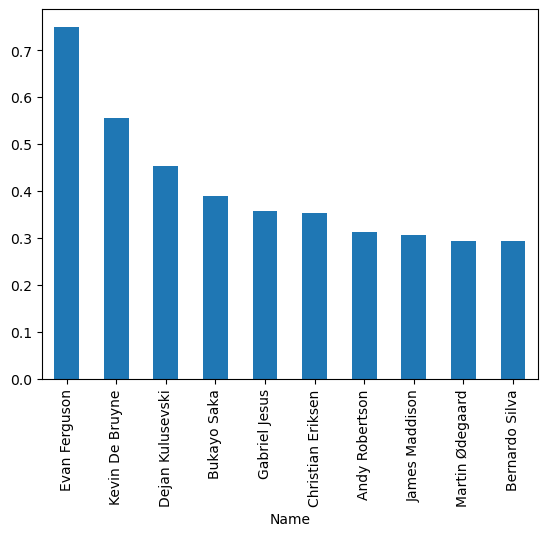

In [167]:
# Bar chart for Top 10 player with highest assist per game
assist_per_game.set_index("Name").loc[:, "ASSIST_PER_GAME"].sort_values(ascending=False)[:10].plot.bar();